## Importación de las líbrerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import re
from cleaning import extraer_data
from cleaning import idioma_ingles
from cleaning import calcular_nuevo_año

## Carga de Dataset

In [2]:
serie_df = pd.read_csv('archive/tvs.csv')
serie_df.sample(3)

,_id,created_by,first_air_date,genres,id,in_production,last_air_date,name,number_of_episodes,number_of_seasons,...,original_language,original_name,overview,popularity,poster_path,production_companies,status,tagline,vote_average,vote_count
118655,64582bf77b901e08b14680bb,[],2013-01-01,"[{""id"":10767,""name"":""Talk"",""_id"":{""$oid"":""6458...",138578,True,2022-12-31,樊登读书,398.0,10,...,zh,樊登读书,NaN,11.729,/e98EOyXaoKLfDJNjpERsEnF9Pqt.jpg,[],Returning Series,NaN,0.0,0
62732,6457fe3c7b901e08b143f4ff,[],2016-12-16,[],70173,True,2016-12-31,明星志愿,6.0,1,...,zh,明星志愿,Lin Fen Fen is working hard to become a singer...,0.600,/2jGgD0dAf1vA2ZJJajDk82OaOl4.jpg,[],Returning Series,NaN,0.0,0
43200,6457ee507b901e08b1432ac0,"[{""id"":1257752,""name"":""Dale Burshtein"",""_id"":{...",NaN,[],46783,False,NaN,From Spain With Love with Annie Sibonney,0.0,0,...,en,From Spain With Love with Annie Sibonney,From Spain With Love with Annie Sibonney is an...,0.600,NaN,[],Ended,NaN,0.0,0


## Analisis Exploratorio

In [3]:
# Realizo una copia del archivo original y trabajo sobre el
series_df = serie_df.copy()
# Empiezo a realizar el analisis
series_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150802.0,95452.023077,65908.935205,1.0,40398.25,86226.500,132047.75,226235.000
number_of_episodes,150168.0,24.704231,136.447485,0.0,1.00,6.000,20.00,19925.000
number_of_seasons,150802.0,1.550377,3.031528,0.0,1.00,1.000,1.00,345.000
popularity,150802.0,3.487269,22.754721,0.0,0.60,0.737,1.91,2162.502
vote_average,150802.0,2.400667,3.477006,0.0,0.00,0.000,6.00,10.000
vote_count,150802.0,13.953993,193.784426,0.0,0.00,0.000,1.00,21048.000


In [4]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150802 entries, 0 to 150801
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _id                   150802 non-null  object 
 1   created_by            150802 non-null  object 
 2   first_air_date        119932 non-null  object 
 3   genres                150802 non-null  object 
 4   id                    150802 non-null  int64  
 5   in_production         150802 non-null  bool   
 6   last_air_date         122108 non-null  object 
 7   name                  150796 non-null  object 
 8   number_of_episodes    150168 non-null  float64
 9   number_of_seasons     150802 non-null  int64  
 10  origin_country        150802 non-null  object 
 11  original_language     150802 non-null  object 
 12  original_name         150796 non-null  object 
 13  overview              84623 non-null   object 
 14  popularity            150802 non-null  float64
 15  

In [5]:
# verifico duplicados
series_df.duplicated(subset =[ '_id', 'created_by', 'first_air_date', 'genres', 'id', 'in_production',
       'last_air_date', 'name', 'number_of_episodes', 'number_of_seasons',
       'origin_country', 'original_language', 'original_name', 'overview',
       'popularity', 'poster_path', 'production_companies', 'status',
       'tagline', 'vote_average', 'vote_count'],keep = False).sum()

0

In [6]:
#verifico la cantidad de NaN
series_df.isnull().sum()

_id                          0
created_by                   0
first_air_date           30870
genres                       0
id                           0
in_production                0
last_air_date            28694
name                         6
number_of_episodes         634
number_of_seasons            0
origin_country               0
original_language            0
original_name                6
overview                 66179
popularity                   0
poster_path              55875
production_companies         0
status                       0
tagline                 146238
vote_average                 0
vote_count                   0
dtype: int64

# Limpieza

In [7]:
# elimino peliculas sin nombres que no me influyen en los datos
series_df.drop(series_df[~series_df['name'].notna()].index, inplace=True)

In [8]:
#elimino fila con error para poder hacer el cambio de la siguiente celda
series_df = series_df.drop([149713])

In [9]:
# cambio el tipo de objeto a date de esas columnas
series_df['first_air_date_new'] = pd.to_datetime(series_df['first_air_date'])
series_df['last_air_date_new'] = pd.to_datetime(series_df['last_air_date'])

In [10]:
series_df['first_air_date_new'] = series_df.apply(calcular_nuevo_año, axis=1)

/mnt/c/Users/wmarq/Curso/Challenge-3_Limpieza-con-Pandas/cleaning.py:39: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  if row['first_air_date_new'].date() > row['last_air_date_new'].date():


TypeError: relativedelta.__init__() got an unexpected keyword argument 'semanas'

In [11]:
# intercanbio los valores NaN con "Desconocido" en esta columna
series_df['createdby'] = series_df['created_by'].fillna('desconocido')

In [12]:
# cambio los valores [] dentro de las columnas
series_df['creado_por'] = series_df.createdby.replace('[]', 'Desconocido')

In [13]:
series_df.shape

(150795, 25)

In [14]:
# extraigo la data necesaria de estas dos columnas
series_df['genero'] = series_df.genres.apply(extraer_data)
series_df['creado'] = series_df.creado_por.apply(extraer_data)

In [15]:
series_df.head(5)

,_id,created_by,first_air_date,genres,id,in_production,last_air_date,name,number_of_episodes,number_of_seasons,...,status,tagline,vote_average,vote_count,first_air_date_new,last_air_date_new,createdby,creado_por,genero,creado
0,6457d26c7b901e08b141869d,[],1996-10-09,"[{""id"":35,""name"":""Comedy"",""_id"":{""$oid"":""6457d...",13,True,2022-02-16,How do you like Wednesday?,568.0,4,...,Returning Series,NaN,9.200,2,1996-10-09,2022-02-16,[],Desconocido,Comedy,Desconocido
1,6457d26c7b901e08b141867a,"[{""id"":19303,""name"":""Kevin Smith"",""_id"":{""$oid...",2000-05-31,"[{""id"":16,""name"":""Animation"",""_id"":{""$oid"":""64...",2,False,2002-12-22,Clerks,6.0,1,...,Canceled,NaN,6.897,78,2000-05-31,2002-12-22,"[{""id"":19303,""name"":""Kevin Smith"",""_id"":{""$oid...","[{""id"":19303,""name"":""Kevin Smith"",""_id"":{""$oid...","Animation, Comedy","Kevin Smith, Scott Mosier, David Mandel"
2,6457d26c7b901e08b141869f,[],2006-08-20,"[{""id"":35,""name"":""Comedy"",""_id"":{""$oid"":""6457d...",14,False,2006-11-11,Shuriken School,26.0,1,...,Ended,NaN,5.500,6,2006-08-20,2006-11-11,[],Desconocido,"Comedy, Animation, Action & Adventure",Desconocido
3,6457d26c7b901e08b14186a5,"[{""id"":1074129,""name"":""Fred Rogers"",""_id"":{""$o...",1968-02-19,"[{""id"":10762,""name"":""Kids"",""_id"":{""$oid"":""6457...",15,False,2001-09-07,Mister Rogers' Neighborhood,850.0,31,...,Ended,Won't you be my neighbor?,4.977,88,1968-02-19,2001-09-07,"[{""id"":1074129,""name"":""Fred Rogers"",""_id"":{""$o...","[{""id"":1074129,""name"":""Fred Rogers"",""_id"":{""$o...",Kids,Fred Rogers
4,6457d26c7b901e08b14186ab,"[{""id"":1211910,""name"":""Richard R. Lee"",""_id"":{...",NaN,[],16,False,2005-09-09,Sidewalks: Video Nite,399.0,11,...,Ended,NaN,0.000,0,NaT,2005-09-09,"[{""id"":1211910,""name"":""Richard R. Lee"",""_id"":{...","[{""id"":1211910,""name"":""Richard R. Lee"",""_id"":{...",Desconocido,Richard R. Lee


In [16]:
# elimino columnas que no me son necesarias
series_df.drop(columns=["overview","original_name","poster_path","_id","tagline","first_air_date","last_air_date","genres","production_companies","created_by","createdby","creado_por"],inplace=True)
series_df.head(2)

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado
0,13,True,How do you like Wednesday?,568.0,4,"[""JP""]",ja,21.207,Returning Series,9.200,2,1996-10-09,2022-02-16,Comedy,Desconocido
1,2,False,Clerks,6.0,1,"[""US""]",en,10.620,Canceled,6.897,78,2000-05-31,2002-12-22,"Animation, Comedy","Kevin Smith, Scott Mosier, David Mandel"


# Preguntas:

# 1-.¿Cual es la serie con la duración más corta?

#### Por episodios

In [17]:
min_epi = series_df['number_of_episodes'].min()
mas_corta = series_df[series_df['number_of_episodes'] == min_epi]
mas_corta.head()

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado
5,18,False,W*A*L*T*E*R,0.0,0,"[""US""]",en,3.436,Ended,5.643,7,1984-07-17,NaT,Comedy,Bill Bixby
7,27,False,Bratz,0.0,2,"[""US""]",en,2.136,Ended,8.429,7,NaT,NaT,Desconocido,Desconocido
35,58,False,The Phred on Your Head Show,0.0,0,"[""US""]",en,0.600,Ended,0.000,0,NaT,NaT,Desconocido,Desconocido
36,66,False,Wonderbug,0.0,0,"[""US""]",en,1.340,Ended,0.000,0,NaT,NaT,Desconocido,"Ken Spears, Joe Ruby"
40,91,False,Super Inggo,0.0,0,[],en,0.600,Ended,0.000,0,NaT,NaT,Desconocido,Desconocido


#### Por temporada

In [18]:
min_tem = series_df['number_of_episodes'].min()
mas_corta_tem = series_df[series_df['number_of_seasons'] == min_tem]
mas_corta_tem.head()

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado
5,18,False,W*A*L*T*E*R,0.0,0,"[""US""]",en,3.436,Ended,5.643,7,1984-07-17,NaT,Comedy,Bill Bixby
35,58,False,The Phred on Your Head Show,0.0,0,"[""US""]",en,0.600,Ended,0.000,0,NaT,NaT,Desconocido,Desconocido
36,66,False,Wonderbug,0.0,0,"[""US""]",en,1.340,Ended,0.000,0,NaT,NaT,Desconocido,"Ken Spears, Joe Ruby"
40,91,False,Super Inggo,0.0,0,[],en,0.600,Ended,0.000,0,NaT,NaT,Desconocido,Desconocido
43,94,False,Fox Online,0.0,0,"[""US""]",en,0.848,Ended,0.000,0,NaT,NaT,News,Desconocido


#### Por fecha

In [19]:
series_df['dias_emision'] = (series_df['last_air_date_new'] - series_df['first_air_date_new']).dt.days

In [20]:
min_dia = series_df['dias_emision'].min()
mas_corta_dia = series_df[series_df['dias_emision'] == min_tem]
mas_corta_dia.head()

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision
64,80,False,NBA on TNT,1.0,1,"[""US""]",en,4.064,Canceled,7.897,68,1989-11-04,1989-11-04,Comedy,Desconocido,0.0
203,267,False,Bonds on Bonds,1.0,1,"[""US""]",en,0.600,Ended,0.000,0,2006-04-04,2006-04-04,Desconocido,Desconocido,0.0
314,317,True,Courageous Cat and Minute Mouse,124.0,4,"[""US""]",en,2.102,Returning Series,7.000,1,1960-01-01,1960-01-01,Animation,Bob Kane,0.0
349,382,False,Under One Roof,1.0,1,"[""SG""]",en,1.400,Ended,0.000,0,1997-01-01,1997-01-01,Comedy,Desconocido,0.0
386,421,False,WCW Pro,1.0,1,"[""US""]",en,0.635,Ended,4.000,1,1994-03-12,1994-03-12,Desconocido,"World Championship Wrestling, Jim Crockett Pro...",0.0


# 2-.¿Cual es la serie con la duración más larga?

#### Por episodios

In [21]:
max_epi = series_df['number_of_episodes'].max()
mas_larga = series_df[series_df['number_of_episodes'] == max_epi]
mas_larga.head()

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision
82482,94722,True,Tagesschau,19925.0,70,"[""DE""]",de,212.235,Returning Series,6.6,9,1952-12-26,2021-06-30,News,Desconocido,25023.0


#### Por temporada

In [22]:
max_tem = series_df['number_of_seasons'].max()
mas_larga_tem = series_df[series_df['number_of_seasons'] == max_tem]
mas_larga_tem.head()

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision
15769,16656,False,Fuse,2518.0,345,"[""SU""]",ru,12.544,Ended,7.8,4,1962-06-04,2008-08-03,"Comedy, Documentary, Animation, Family",Sergei Mikhalkov,16862.0


#### Por fecha

In [23]:
max_dia = series_df['dias_emision'].max()
mas_larga_dia = series_df[series_df['dias_emision'] == max_tem]
mas_larga_dia.head()

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision
9786,10361,False,Toonsylvania,21.0,2,"[""US""]",en,7.301,Ended,8.0,1,1998-02-07,1999-01-18,Animation,Steven Spielberg,345.0
31258,33384,False,The Zone,323.0,1,"[""GB""]",en,1.236,Ended,0.0,0,2010-05-20,2011-04-30,Desconocido,Desconocido,345.0
37852,40560,False,Der Millionenbauer,13.0,2,"[""DE""]",de,1.818,Ended,0.0,0,1979-10-18,1980-09-27,Family,Franz Geiger,345.0
38493,41209,False,Die Hydronauten,26.0,2,"[""FI"",""FR"",""DE""]",de,1.150,Ended,0.0,0,2003-09-13,2004-08-23,Desconocido,Desconocido,345.0
48958,53406,True,Chuck's Eat the Street,14.0,2,[],en,0.600,Returning Series,0.0,0,2012-10-09,2013-09-19,Desconocido,Desconocido,345.0


# 3-.¿Cual es la serie con más temporadas? ¿Y la que tiene más capítulos?

#### Mas temporadas

In [24]:
max_tem = series_df['number_of_seasons'].max()
mas_larga_tem = series_df[series_df['number_of_seasons'] == max_tem]
mas_larga_tem.head()

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision
15769,16656,False,Fuse,2518.0,345,"[""SU""]",ru,12.544,Ended,7.8,4,1962-06-04,2008-08-03,"Comedy, Documentary, Animation, Family",Sergei Mikhalkov,16862.0


#### Mas capitulos

In [25]:
max_epi = series_df['number_of_episodes'].max()
mas_larga = series_df[series_df['number_of_episodes'] == max_epi]
mas_larga.head()

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision
82482,94722,True,Tagesschau,19925.0,70,"[""DE""]",de,212.235,Returning Series,6.6,9,1952-12-26,2021-06-30,News,Desconocido,25023.0


# 5-.¿Cual es la media de temporadas por género?

In [26]:
series_df.groupby('genero').agg({'number_of_seasons':'mean'})

,number_of_seasons
genero,
Action & Adventure,1.437690
"Action & Adventure, Animation",1.398601
"Action & Adventure, Animation, Comedy",1.969231
"Action & Adventure, Animation, Comedy, Crime",1.000000
"Action & Adventure, Animation, Comedy, Crime, Sci-Fi & Fantasy, Kids",1.000000
...,...
"Western, Reality",2.000000
"Western, Sci-Fi & Fantasy",1.000000
"Western, Sci-Fi & Fantasy, Action & Adventure, Animation",1.000000


#### Al estar agrupados la media no es correcta, por eso los separo en el siguiente codigo y hago la media

In [27]:
# hago otra copia para trabajar sobre ella un par de veces, porque necesito separar los generos correctamente
series_df2 = series_df.copy()

In [28]:
series_df2['genero_separado'] = series_df2['genero'].str.split(',') 
series_df2 = series_df2.explode('genero_separado')  
med_gene = series_df2.groupby('genero_separado').agg({'number_of_seasons':'mean'}).round(2)
med_gene

,number_of_seasons
genero_separado,
Action & Adventure,1.73
Animation,2.07
Comedy,1.90
Crime,1.77
Documentary,2.91
Drama,1.77
Family,2.35
History,2.03
Kids,2.27


# 4-.¿Cual es el género más estrenado para cada mes y año?

In [29]:
mes_año_genero = series_df2.groupby([series_df2['first_air_date_new'].dt.year, series_df2['first_air_date_new'].dt.month])['genero_separado'].agg(lambda x: x.value_counts().index[0])
mes_año_genero

first_air_date_new  first_air_date_new
1917.0              1.0                   Documentary
1936.0              11.0                  Desconocido
1938.0              7.0                   Desconocido
                    8.0                         Drama
1939.0              3.0                   Desconocido
                                             ...     
2024.0              6.0                   Desconocido
                    12.0                  Desconocido
2025.0              1.0                   Desconocido
2026.0              2.0                        Comedy
2046.0              2.0                         Crime
Name: genero_separado, Length: 942, dtype: object

# 6-. Listado de los 10 creadores más prolíficos.

In [30]:
series_df2['director_separado'] = series_df2['creado'].str.split(',')
series_df2 = series_df2.explode('director_separado')
mas_peli = series_df2.groupby('director_separado').agg({'name':'count'}).round(2)
mas_peli = mas_peli.sort_values(by='name', ascending=False)
mas_peli.iloc[1:10]

,name
director_separado,
Shotaro Ishinomori,167
Joseph Barbera,133
William Hanna,131
Khmerzoon,112
Adrián Suar,109
John de Mol,93
Joe Ruby,86
Go Nagai,83
Beto Ribeiro,80


# 7-.¿Que género es el que más producen estos escritores?

In [31]:
directores_con_mas_series = mas_peli.iloc[1:10]  # Filtrar los directores con más series
genero_mas_producido = series_df2[series_df2['director_separado'].isin(directores_con_mas_series.index)]
genero_mas_producido = genero_mas_producido.groupby(['director_separado', 'genero']).size().reset_index(name='cantidad')
genero_mas_producido = genero_mas_producido.sort_values(by=['director_separado', 'cantidad'], ascending=[True, False])
genero_mas_producido.groupby('director_separado').first()['genero']
genero_mas_producido

,director_separado,genero,cantidad
2,Beto Ribeiro,"Action & Adventure, Documentary, Drama, Reality",8
3,Beto Ribeiro,"Action & Adventure, Documentary, Reality",6
0,Beto Ribeiro,"Action & Adventure, Comedy, Documentary, Reality",4
7,Beto Ribeiro,Comedy,4
11,Beto Ribeiro,"Crime, Documentary, Mystery, Reality",4
...,...,...,...
187,Shotaro Ishinomori,"Sci-Fi & Fantasy, Comedy",2
188,Shotaro Ishinomori,"Sci-Fi & Fantasy, Drama",2
175,Shotaro Ishinomori,Animation,1
183,Shotaro Ishinomori,Drama,1


## 8-. ¿Cuanto duran de media en el aire las series? ¿Y por género?

#### Media de las series

In [32]:
series_df.dias_emision.mean()

471.69867300322966

#### Media de las series por genero

In [33]:
series_df2.groupby('genero_separado').agg({'dias_emision':'mean'})

,dias_emision
genero_separado,
Action & Adventure,585.431852
Animation,810.296972
Comedy,623.669205
Crime,518.369995
Documentary,838.441353
Drama,535.043985
Family,768.074376
History,753.857143
Kids,858.761478


# Transformaciones:

## 1-.Crea una nueva columna llamada 'media_episodios' que el número de episodios por temporada de cada serie.

In [34]:
series_df['media_episodios'] = (series_df.number_of_episodes / series_df.number_of_seasons).round(2)
series_df

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision,media_episodios
0,13,True,How do you like Wednesday?,568.0,4,"[""JP""]",ja,21.207,Returning Series,9.200,2,1996-10-09,2022-02-16,Comedy,Desconocido,9261.0,142.00
1,2,False,Clerks,6.0,1,"[""US""]",en,10.620,Canceled,6.897,78,2000-05-31,2002-12-22,"Animation, Comedy","Kevin Smith, Scott Mosier, David Mandel",935.0,6.00
2,14,False,Shuriken School,26.0,1,"[""FR"",""ES""]",en,3.034,Ended,5.500,6,2006-08-20,2006-11-11,"Comedy, Animation, Action & Adventure",Desconocido,83.0,26.00
3,15,False,Mister Rogers' Neighborhood,850.0,31,"[""US""]",en,19.167,Ended,4.977,88,1968-02-19,2001-09-07,Kids,Fred Rogers,12254.0,27.42
4,16,False,Sidewalks: Video Nite,399.0,11,"[""US""]",en,2.910,Ended,0.000,0,NaT,2005-09-09,Desconocido,Richard R. Lee,NaN,36.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150797,226231,False,北京之夜,4.0,1,"[""CN""]",zh,0.000,Ended,0.000,0,2015-06-12,2015-06-13,Documentary,Desconocido,1.0,4.00
150798,226232,False,北洋海军兴亡史,6.0,1,"[""CN""]",zh,0.000,Ended,0.000,0,2014-07-29,2014-09-02,Documentary,Desconocido,35.0,6.00
150799,226233,True,Turkey: Empire of Erdogan,1.0,1,"[""US""]",en,0.000,Returning Series,0.000,0,2023-05-09,2023-05-09,Desconocido,Desconocido,0.0,1.00
150800,226234,True,Woooooo! Becoming Ric Flair,1.0,1,"[""US""]",en,0.000,Returning Series,0.000,0,2023-01-24,2023-01-24,Desconocido,Desconocido,0.0,1.00


## 2-. Crea una nueva columna llamada 'habla_inglesa' que indique si la serie está en inglés o no.

In [35]:
series_df['habla_inglesa'] = series_df.original_language.apply(idioma_ingles)
series_df

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision,media_episodios,habla_inglesa
0,13,True,How do you like Wednesday?,568.0,4,"[""JP""]",ja,21.207,Returning Series,9.200,2,1996-10-09,2022-02-16,Comedy,Desconocido,9261.0,142.00,No es habla Inglesa
1,2,False,Clerks,6.0,1,"[""US""]",en,10.620,Canceled,6.897,78,2000-05-31,2002-12-22,"Animation, Comedy","Kevin Smith, Scott Mosier, David Mandel",935.0,6.00,Es habla Inglesa
2,14,False,Shuriken School,26.0,1,"[""FR"",""ES""]",en,3.034,Ended,5.500,6,2006-08-20,2006-11-11,"Comedy, Animation, Action & Adventure",Desconocido,83.0,26.00,Es habla Inglesa
3,15,False,Mister Rogers' Neighborhood,850.0,31,"[""US""]",en,19.167,Ended,4.977,88,1968-02-19,2001-09-07,Kids,Fred Rogers,12254.0,27.42,Es habla Inglesa
4,16,False,Sidewalks: Video Nite,399.0,11,"[""US""]",en,2.910,Ended,0.000,0,NaT,2005-09-09,Desconocido,Richard R. Lee,NaN,36.27,Es habla Inglesa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150797,226231,False,北京之夜,4.0,1,"[""CN""]",zh,0.000,Ended,0.000,0,2015-06-12,2015-06-13,Documentary,Desconocido,1.0,4.00,No es habla Inglesa
150798,226232,False,北洋海军兴亡史,6.0,1,"[""CN""]",zh,0.000,Ended,0.000,0,2014-07-29,2014-09-02,Documentary,Desconocido,35.0,6.00,No es habla Inglesa
150799,226233,True,Turkey: Empire of Erdogan,1.0,1,"[""US""]",en,0.000,Returning Series,0.000,0,2023-05-09,2023-05-09,Desconocido,Desconocido,0.0,1.00,Es habla Inglesa
150800,226234,True,Woooooo! Becoming Ric Flair,1.0,1,"[""US""]",en,0.000,Returning Series,0.000,0,2023-01-24,2023-01-24,Desconocido,Desconocido,0.0,1.00,Es habla Inglesa


## 3-.Crear una nueva columna llamada 'produccion_europea' que indique si la serie es de producción europea o no.

## 4-. Crea una nueva columna llamada 'mes_cancelacion' que indique el mes en el que se canceló la serie.

In [36]:
series_df['mes_cancelacion'] = series_df['last_air_date_new'].dt.strftime('%B')
series_df

,id,in_production,name,number_of_episodes,number_of_seasons,origin_country,original_language,popularity,status,vote_average,vote_count,first_air_date_new,last_air_date_new,genero,creado,dias_emision,media_episodios,habla_inglesa,mes_cancelacion
0,13,True,How do you like Wednesday?,568.0,4,"[""JP""]",ja,21.207,Returning Series,9.200,2,1996-10-09,2022-02-16,Comedy,Desconocido,9261.0,142.00,No es habla Inglesa,February
1,2,False,Clerks,6.0,1,"[""US""]",en,10.620,Canceled,6.897,78,2000-05-31,2002-12-22,"Animation, Comedy","Kevin Smith, Scott Mosier, David Mandel",935.0,6.00,Es habla Inglesa,December
2,14,False,Shuriken School,26.0,1,"[""FR"",""ES""]",en,3.034,Ended,5.500,6,2006-08-20,2006-11-11,"Comedy, Animation, Action & Adventure",Desconocido,83.0,26.00,Es habla Inglesa,November
3,15,False,Mister Rogers' Neighborhood,850.0,31,"[""US""]",en,19.167,Ended,4.977,88,1968-02-19,2001-09-07,Kids,Fred Rogers,12254.0,27.42,Es habla Inglesa,September
4,16,False,Sidewalks: Video Nite,399.0,11,"[""US""]",en,2.910,Ended,0.000,0,NaT,2005-09-09,Desconocido,Richard R. Lee,NaN,36.27,Es habla Inglesa,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150797,226231,False,北京之夜,4.0,1,"[""CN""]",zh,0.000,Ended,0.000,0,2015-06-12,2015-06-13,Documentary,Desconocido,1.0,4.00,No es habla Inglesa,June
150798,226232,False,北洋海军兴亡史,6.0,1,"[""CN""]",zh,0.000,Ended,0.000,0,2014-07-29,2014-09-02,Documentary,Desconocido,35.0,6.00,No es habla Inglesa,September
150799,226233,True,Turkey: Empire of Erdogan,1.0,1,"[""US""]",en,0.000,Returning Series,0.000,0,2023-05-09,2023-05-09,Desconocido,Desconocido,0.0,1.00,Es habla Inglesa,May
150800,226234,True,Woooooo! Becoming Ric Flair,1.0,1,"[""US""]",en,0.000,Returning Series,0.000,0,2023-01-24,2023-01-24,Desconocido,Desconocido,0.0,1.00,Es habla Inglesa,January


# Visualizaciones

### Grafico para diferenciar la cantidad de series que aun estan en produccion y las que han sido canceladas

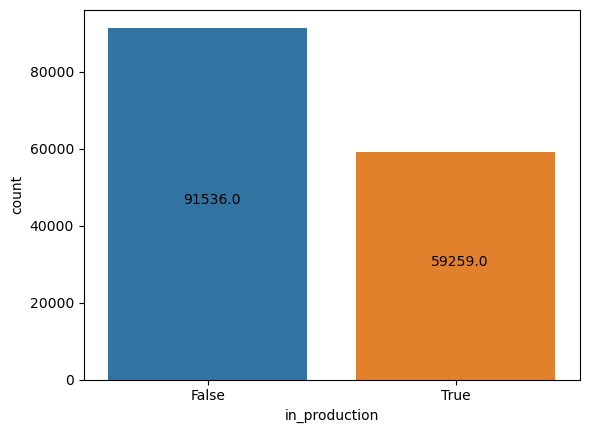

In [37]:
diferencians_produccion = sns.countplot(series_df,x='in_production')
for p in diferencians_produccion.patches:
    diferencians_produccion.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

### Mapa de calor de la correlacion entre los datos

/tmp/ipykernel_364/1234795761.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = series_df.corr()


<Axes: >

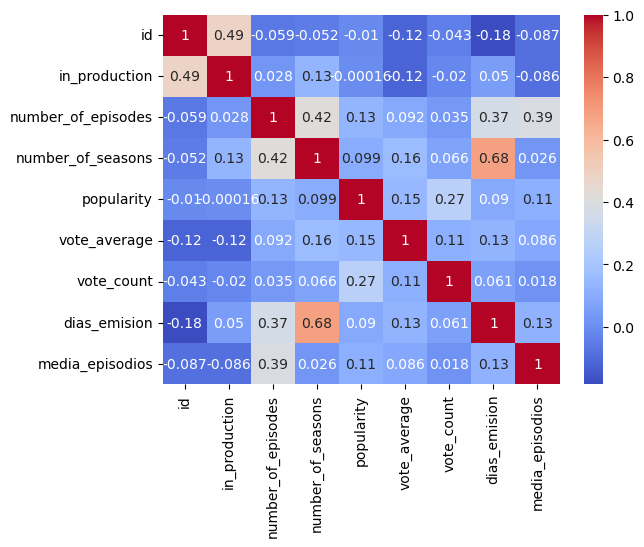

In [38]:
correlacion = series_df.corr()
sns.heatmap(correlacion,annot = True,cmap='coolwarm',)

#### Relacion entre si a mayor cantidad de episodios, es tan popular

<Axes: xlabel='number_of_episodes', ylabel='popularity'>

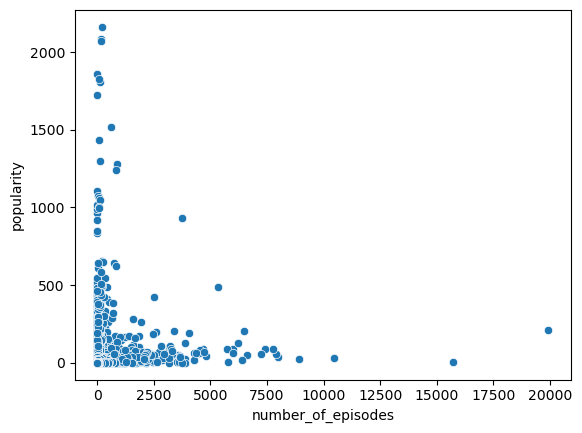

In [39]:
sns.scatterplot(data=series_df, x="number_of_episodes", y="popularity")

#### Transformacion para reduccion de tamaño

In [ ]:
series_df.info()

In [ ]:
# Verificar si hay valores faltantes en el DataFrame
hay_faltantes = series_df.isna().any()

# Mostrar las columnas que contienen valores faltantes
columnas_con_faltantes = hay_faltantes[hay_faltantes].index
print(columnas_con_faltantes)


In [ ]:
columnas = ['overview', 'first_air_date_new', 'last_air_date_new', 'media_episodios', 'mes_cancelacion']
series_df[columnas] = series_df[columnas].replace([np.inf, -np.inf], 0)

In [ ]:
series_df.id  = series_df.id.astype(dtype='int16')
series_df['number_of_episodes'] = series_df['number_of_episodes'].fillna(0).astype('int16')
series_df['number_of_seasons'] = series_df['number_of_seasons'].fillna(0).astype('int16')
series_df['popularity'] = series_df['popularity'].fillna(0).astype('int16')
series_df['vote_count'] = series_df['vote_count'].fillna(0).astype('int16')
series_df['dias_emision'] = series_df['dias_emision'].fillna(0).astype('int16')
series_df['media_episodios'] = series_df['media_episodios'].fillna(0).astype('int16')

In [40]:
series_df.to_csv('clean_data.csv')